# Atelier 01 : Apprentissage supervisé avec Python

- Data Preprocessing (données hétérogènes, données manquantes, etc.)
- Feature engineering
- Feature selection
- Classification
- Evaluation de la qualité d’un classifieur

<h2> I. Apprentissage supervisé : Feature engineering et Classification

<h4> 1. Chargement des données et préparation

In [1]:
#import libraries
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("credit_scoring.csv", sep=';')
data

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,1.0,1.0,60.0,39.0,0.0,1.0,0.0,69.0,92.0,0.0,0.0,900.0,1020.0,0
4371,22.0,0.0,60.0,46.0,0.0,1.0,0.0,60.0,75.0,3000.0,600.0,950.0,1263.0,1
4372,0.0,0.0,24.0,37.0,0.0,1.0,1.0,60.0,90.0,3500.0,0.0,500.0,963.0,0
4373,0.0,1.0,48.0,23.0,1.0,1.0,1.0,49.0,140.0,0.0,0.0,550.0,550.0,1


In [3]:
data.shape

(4375, 14)

In [4]:
# séparation des variables caractéristiques de la variable à prédire
y = data["Status"]
X = data.drop("Status", axis=1)

In [5]:
# transformation du DATAFRAME en ARRAY
y = y.to_numpy()
X = X.to_numpy()

In [6]:
# print the shape
print("Taille des donnees")
print("X shape: ", X.shape)
print("y shape: ", y.shape)
# pourcentage de chaque classe
print("Pourcentage de chaque classe")
print(data["Status"].value_counts(normalize=True))


Taille des donnees
X shape:  (4375, 13)
y shape:  (4375,)
Pourcentage de chaque classe
1    0.722057
0    0.277943
Name: Status, dtype: float64


In [7]:
# split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
X_train

array([[   2.,    1.,   48., ...,    0., 1100., 1464.],
       [  15.,    0.,   24., ...,    0.,  590., 1793.],
       [   1.,    1.,   48., ...,    0., 1300., 1533.],
       ...,
       [  11.,    1.,   12., ...,    0.,  300., 1479.],
       [   0.,    1.,   48., ...,    0.,  600., 1452.],
       [   1.,    1.,   36., ...,    0., 1200., 2186.]])

<h4>2. Apprentissage et évaluation de modèles

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Métrique de performance
def metric(y_true, y_pred):
    return (accuracy_score(y_true, y_pred) + precision_score(y_true, y_pred)) / 2


<Figure size 640x480 with 0 Axes>

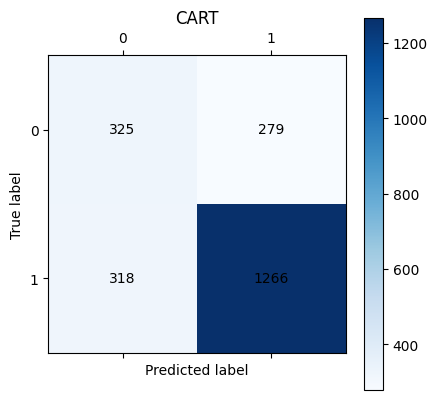

<Figure size 640x480 with 0 Axes>

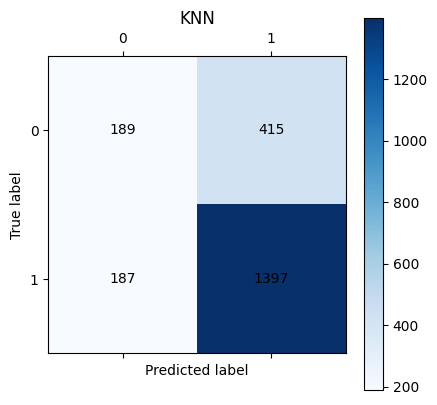

<Figure size 640x480 with 0 Axes>

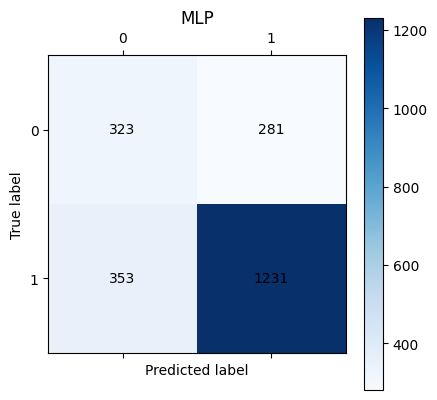

,Accuracy,Precision,Recall,Metric,F1-Score
CART,0.727148,0.819417,0.799242,0.773283,0.809204
KNN,0.724863,0.770971,0.881944,0.747917,0.822733
MLP,0.710238,0.814153,0.777146,0.762196,0.795220


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

def compare_models(X_train, X_test, y_train, y_test):
    models = {
        'CART': DecisionTreeClassifier(random_state=1),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'MLP': MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)
    }
    # save into a dataframe
    results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'Metric', 'F1-Score'])
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # plot the confusion matrix
        plt.figure()
        cm = confusion_matrix(y_test, y_pred)
        plt.matshow(cm, cmap=plt.cm.Blues)
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                plt.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
        plt.colorbar()
        plt.title(name)
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()
        
        results.loc[name] = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), metric(y_test, y_pred), f1_score(y_test, y_pred)]
    return results

compare_models(X_train, X_test, y_train, y_test)

Dans le cadre du crédit scoring, il est important de choisir un modèle en fonction des besoins spécifiques de la banque, ce qui reviens a choisir un model avec une precision élevée, garantissant que les crédits accordés le sont à des personnes plus fiables.

Ici c'est le cart qui est plus adequat avec selon la precision mais ceci n'est pas suffissant pour dire que c'est le meilleur

<h4>3. Normalisation des variables continues

<Figure size 640x480 with 0 Axes>

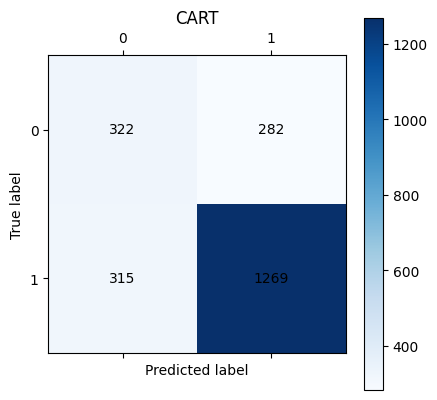

<Figure size 640x480 with 0 Axes>

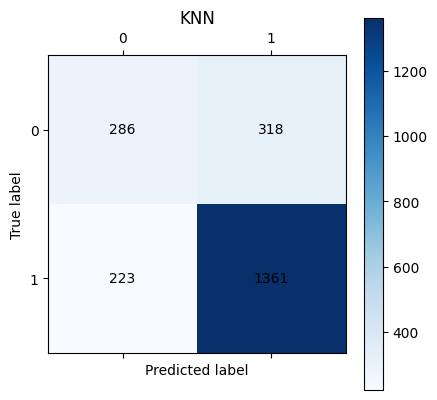

<Figure size 640x480 with 0 Axes>

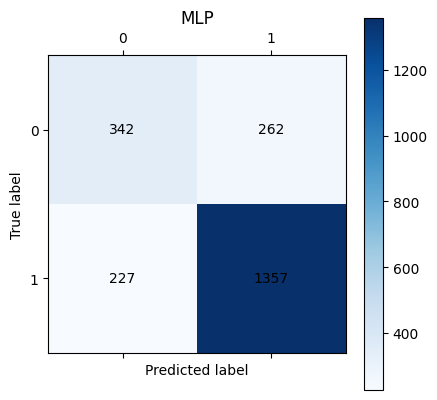

,Accuracy,Precision,Recall,Metric,F1-Score
CART,0.727148,0.818182,0.801136,0.772665,0.809569
KNN,0.752742,0.810602,0.859217,0.781672,0.834202
MLP,0.776508,0.838172,0.856692,0.807340,0.847331


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

compare_models(X_train_scaled, X_test_scaled, y_train, y_test)

<p> La normalisation a eu peu d'impact sur les performances de CART mais a significativement amélioré celles de KNN et MLPC, deux modèles dépendants des distances ou des gradients. Pour des données non normalisées, CART semble performant. Cependant, après normalisation, KNN et MLPC surpassent CART, en particulier MLPC qui affiche l'accuracy et le rappel les plus élevés.

Dans une analyse comparative, il est judicieux de normaliser pour voir comment les modèles réagissent et pour choisir celui qui fonctionne le mieux dans des conditions optimales.

Le model choisi sera <b>MLCP</b> avec ca precision qui est élevée ainsi que son F1-score

<h4>4. Sélection de variables 

Features sorted by their score:
         0          1
0   0.1481     Income
1   0.1302  Seniority
2   0.1227      Price
3   0.1169     Amount
4   0.1023        Age
5   0.0828     Assets
6   0.0736   Expenses
7   0.0662    Records
8   0.0471       Time
9   0.0416        Job
10  0.0324       Debt
11  0.0202       Home
12  0.0159    Marital
Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


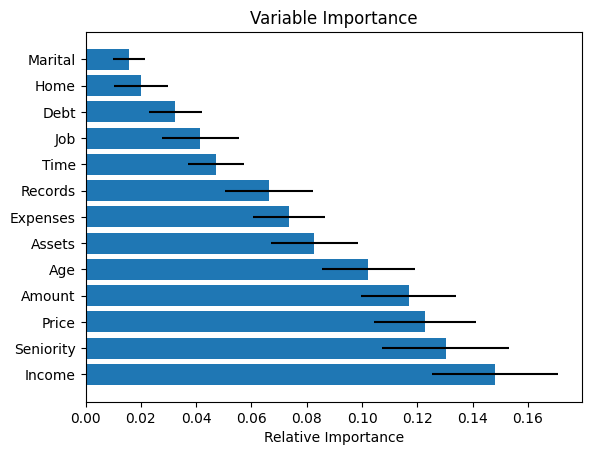

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000,random_state=1)
clf.fit(X_train_scaled, y_train)

importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]

features = data.drop("Status", axis=1).columns
print("Features sorted by their score:")
print(pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), features), reverse=True)))
print(features[sorted_idx])

padding = np.arange(X_train_scaled.size/len(X_train_scaled)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

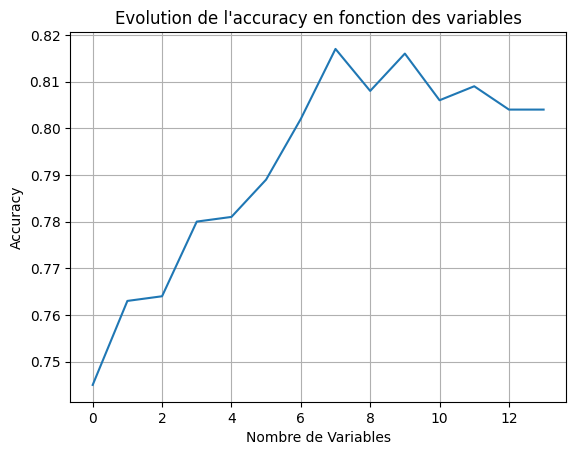

In [12]:
scores=np.zeros(X_train_scaled.shape[1]+1)

MLPC = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)

for f in np.arange(0, X_train_scaled.shape[1]+1):
 X1_f = X_train_scaled[:,sorted_idx[:f+1]]
 X2_f = X_test_scaled[:,sorted_idx[:f+1]]
 MLPC.fit(X1_f,y_train)
 YMLCP = MLPC.predict(X2_f)
 scores[f]=np.round(((accuracy_score(y_test,YMLCP)+ precision_score(y_test,YMLCP))/2),3)


plt.plot(scores)
plt.grid()
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

- Observations sur les importances : <br>
Les variables Marital (0.0159), Home (0.0202), Debt (0.0324) et Job (0.0416) ont des importances significativement plus faibles. <br>
Ces variables sont moins susceptibles d'influencer les décisions du modèle de manière notable.

- Observations sur les scores : <br>
Le score est relativement stable pour les variables Home (0.804) et Marital (0.804). <br>
L'ajout de ces variables n'entraîne pas une amélioration significative des performances globales.

<h5>Variables à conserver</h5>
Les variables ayant une importance élevée et un impact positif notable sur les scores sont à conserver :

Income, Seniority, Price, Amount, Age, Assets, Expenses, Records, Time.

<h5>Variables à supprimer</h5>
Les variables avec une faible importance et une contribution limitée aux performances globales :

Marital : Importance faible (0.0159), score minimal (0.804). <br>
Home : Importance faible (0.0202), score minimal (0.804). <br>
Debt : Importance modérée (0.0324), mais faible amélioration du score. <br>
Job : Importance faible (0.0416), score limité (0.806). <br>

Features sorted by their score:
        0          1
0  0.1784  Seniority
1  0.1534       Time
2  0.1486       Home
3  0.1407        Age
4  0.1241    Marital
5  0.0993    Records
6  0.0877        Job
7  0.0677   Expenses
Index(['Seniority', 'Time', 'Home', 'Age', 'Marital', 'Records', 'Job',
       'Expenses'],
      dtype='object')


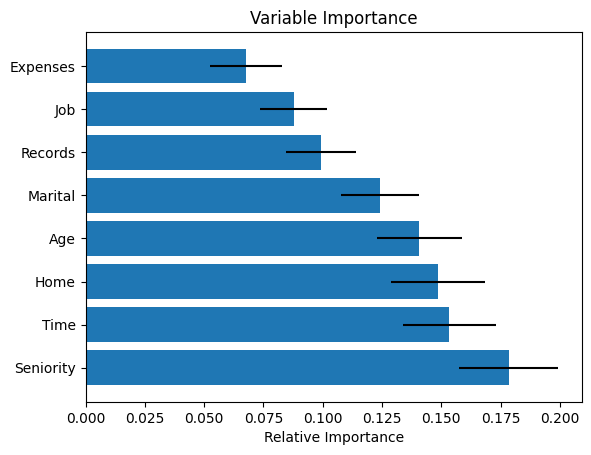

In [13]:
# selection des variables les plus importantes 
X_train = X_train_scaled[:,sorted_idx[:np.argmax(scores)+1]]
X_test = X_test_scaled[:,sorted_idx[:np.argmax(scores)+1]]

clf = RandomForestClassifier(n_estimators=1000,random_state=1)
clf.fit(X_train, y_train)

importances=clf.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features = data.drop("Status", axis=1).columns

# print the result in a pd frame
print("Features sorted by their score:")
print(pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), features), reverse=True))
)

print(features[sorted_idx])
padding = np.arange(X_train.size/len(X_train)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()



Scores
           Scores
0           0.745
Seniority   0.746
Time        0.760
Home        0.778
Age         0.778
Marital     0.791
Records     0.796
Job         0.814
Expenses    0.812


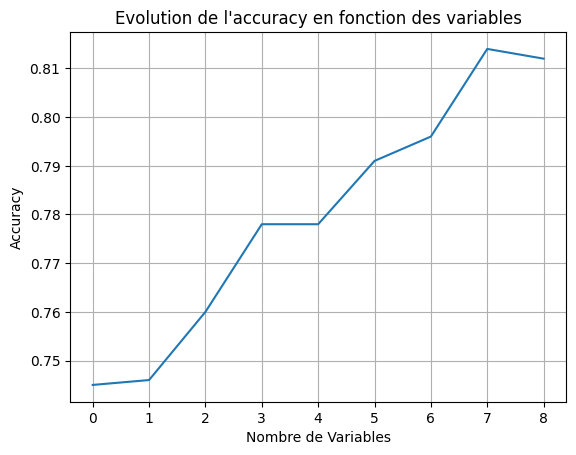

In [14]:
scores=np.zeros(X_train.shape[1]+1)

MLPC = MLPClassifier()
for f in np.arange(0, X_train.shape[1]+1):
 X1_f = X_train[:,sorted_idx[:f+1]]
 X2_f = X_test[:,sorted_idx[:f+1]]
 MLPC.fit(X1_f,y_train)
 YMLCP = MLPC.predict(X2_f)
 scores[f]=np.round(((accuracy_score(y_test,YMLCP)+ precision_score(y_test,YMLCP))/2),3)

# print the result in a pd frame
print("Scores")
# add a column of the name of the variables to the scores
print(pd.DataFrame(scores, columns=["Scores"], index=np.append("0",features[sorted_idx])))


plt.plot(scores)
plt.grid()
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

<h4>5. Paramétrage des classifieurs

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(20, 10), (40, 20), (60, 30)],
    # 'activation': ['relu', 'tanh'],
    # 'alpha': [0.0001, 0.001, 0.01],
    # 'learning_rate': ['constant', 'adaptive']
}

mlpc = MLPClassifier(random_state=1)
grid_search = GridSearchCV(mlpc, param_grid, cv=5, scoring=lambda clf, X, y: (accuracy_score(y, clf.predict(X)) + precision_score(y, clf.predict(X))) / 2)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score:", grid_search.best_score_)

Meilleurs paramètres: {'hidden_layer_sizes': (40, 20)}
Meilleur score: 0.793627289556704


<h4>6. Création d’un pipeline

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import pickle

pipeline = Pipeline([
    ('scaler', StandardScaler()),    # Normalisation
    ('pca', PCA()),                  # ACP
    ('classifier', MLPClassifier(**grid_search.best_params_, random_state=1))  # Classifieur
])

pipeline.fit(X_train, y_train)

# sauvegarde du pipeline
with open('credit_scoring_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

# Code pour utiliser le pipeline sauvegardé
with open('credit_scoring_pipeline.pkl', 'rb') as f:
    loaded_pipeline = pickle.load(f)

y_pred = loaded_pipeline.predict(X_test)
print("Accuracy du pipeline chargé:", accuracy_score(y_test, y_pred))


Accuracy du pipeline chargé: 0.7847349177330896


<h4>7. Comparaison de plusieurs algorithmes d’apprentissage

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
import time

def run_classifiers(clfs, X, y):
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    
    result = pd.DataFrame(columns=['Accuracy', 'AUC', '(Accuracy + Precision) / 2', 'Time(s)'])
    for name, clf in clfs.items():
        start_time = time.time()
        
        cv_acc = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
        cv_auc = cross_val_score(clf, X, y, cv=kf, scoring='roc_auc')
        cv_custom = cross_val_score(clf, X, y, cv=kf, scoring=lambda clf, X, y: (accuracy_score(y, clf.predict(X)) + precision_score(y, clf.predict(X))) / 2)
        
        end_time = time.time()
        
        result.loc[name] = [cv_acc.mean(), cv_auc.mean(), cv_custom.mean(), end_time - start_time]
    return result

# Utilisation de la fonction
clfs = {
    'MLPC': MLPClassifier(**grid_search.best_params_, random_state=1),
    'RF': RandomForestClassifier(n_estimators=200, random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'XGboost': XGBClassifier(n_estimators=200, random_state=1),
    'ID3': DecisionTreeClassifier(criterion='entropy', random_state=1),
}

run_classifiers(clfs, X, y)

,Accuracy,AUC,(Accuracy + Precision) / 2,Time
MLPC,0.717020,0.723947,0.757256,29.001811
RF,0.786286,0.829035,0.802001,78.012832
KNN,0.715204,0.662246,0.741076,1.650397
XGboost,0.765261,0.805238,0.792732,11.119675
ID3,0.723428,0.663542,0.768733,1.560179


<h2>II. Apprentissage supervisé : Données hétérogènes

Le fichier "credit.data" comporte 688 instances décrites par 15 variables caractéristiques (6 numériques, 9
catégorielles) et la variable à prédire "classe" (la dernière colonne du fichier) de nature nominale possédant un
nombre fini de valeurs (ici deux valeurs "+" et "–"). Il ne s’agit pas d’une tâche de régression, mais de
classification. Les exemples de ce jeu de données représentent des personnes (positifs et négatifs) pour lesquels
un crédit a été accordé ou non. 
(https://archive.ics.uci.edu/ml/datasets/Credit+Approval)

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

<h4> 1. Traitement des caractéristiques continues sans données manquantes

<h5>Chargement et préparation des données

In [111]:
# Importer le jeu de données
data = pd.read_csv("credit.data", header=None, sep='\t' )
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
684,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
685,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
686,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


In [112]:
# Séparer les variables caractéristiques de la variable à prédire
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print(X.shape)
print(y.shape)

(688, 15)
(688,)


In [113]:
# Garder uniquement les variables numériques
numeric_columns = data.select_dtypes(include=[np.number]).columns
X_numeric = X[:, numeric_columns].astype(float)

In [114]:
# nbr de ? dans chaque colonne
print("Nombre de '?' : ", np.sum(X_numeric == '?', axis=0))

# Remplacer les '?' par des nan
X_numeric[X_numeric == '?'] = np.nan # ca sert a rien de faire ca 

Nombre de '?' :  0


In [115]:
# nbr de nan par colonne
print("Nombre de nan : ", np.sum(np.isnan(X_numeric), axis=0))

# Supprimer les individus avec des nan
X_numeric = X_numeric[~np.isnan(X_numeric).any(axis=1)]
y = y[~np.isnan(X_numeric).any(axis=1)]



Nombre de nan :  [0 0 0 0]


In [116]:
# Analyser les propriétés des données
print("Taille de l'échantillon:", X_numeric.shape)
print("Nombre d'exemples positifs:", np.sum(y == '+'))
print("Nombre d'exemples négatifs:", np.sum(y == '-'))

# Binariser la target
y = (y == '+').astype(int)

Taille de l'échantillon: (688, 4)
Nombre d'exemples positifs: 305
Nombre d'exemples négatifs: 383


In [117]:
# Comparaison des algorithmes
print("Résultats sans normalisation:")
run_classifiers(clfs, X_numeric, y)

Résultats sans normalisation:


,Accuracy,AUC,(Accuracy + Precision) / 2,Time
MLPC,0.700661,0.740518,0.683139,2.299839
RF,0.761573,0.813870,0.758629,13.012823
KNN,0.713811,0.737891,0.722885,0.151219
XGboost,0.747016,0.806649,0.732031,5.280087
ID3,0.706351,0.702672,0.691334,0.168382


<h5>Normalisation des variables continues

In [118]:
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

print("Résultats avec normalisation:")
run_classifiers(clfs, X_numeric_scaled, y)

Résultats avec normalisation:


,Accuracy,AUC,(Accuracy + Precision) / 2,Time
MLPC,0.776172,0.832995,0.794740,16.697676
RF,0.763022,0.812438,0.760816,12.648765
KNN,0.732417,0.763992,0.743624,0.128601
XGboost,0.747016,0.806649,0.732031,4.245489
ID3,0.706351,0.702933,0.690682,0.150880


<h4>2. Traitement de la totalité de la base de données

In [119]:
# Séparer les colonnes numériques et catégorielles
df = data.drop(data.columns[-1], axis=1)

numeric_indices = df.select_dtypes(include=[np.number]).columns
categorical_indices = df.select_dtypes(exclude=[np.number]).columns

# Extraire les données numériques et catégorielles
X_num = X[:, numeric_indices]
X_cat = X[:, categorical_indices]

<h5> Traitement des variables numériques

In [120]:
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)

<h5> Traitement des variables catégorielles

In [121]:
for col_id in range(X_cat.shape[1]):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
    X_cat[:, col_id] = val_idx
    
imp_cat = SimpleImputer(missing_values=0, strategy='most_frequent')
X_cat = imp_cat.fit_transform(X_cat)

In [122]:
# Encodage des variables catégorielles
encoder = OneHotEncoder(sparse=False)
X_cat_encoded = encoder.fit_transform(X_cat)

<h5> Construction du jeu de données final

In [123]:
X_final = np.hstack((X_num, X_cat_encoded))

In [124]:
# Normalisation des données
scaler = StandardScaler()
X_final_scaled = scaler.fit_transform(X_final)

In [125]:
print("\nRésultats avec toutes les variables et traitement des données manquantes:")
run_classifiers(clfs, X_final_scaled, y)


Résultats avec toutes les variables et traitement des données manquantes:


,Accuracy,AUC,(Accuracy + Precision) / 2,Time
MLPC,0.651215,0.711711,0.631045,34.265200
RF,0.800895,0.861138,0.819898,20.174829
KNN,0.600171,0.598865,0.578923,2.010485
XGboost,0.774616,0.835361,0.763425,12.730903
ID3,0.739770,0.734099,0.725361,0.440932


Fin :)